Practical 2

In [3]:
# Q2. Perform the following preprocessing tasks on the dirty_iris datasetii.
# i) Calculate the number and percentage of observations that are complete.
# ii) Replace all the special values in data with NA.
# iii) Define these rules in a separate text file and read them.
# (Use editfile function in R (package editrules). Use similar function in Python).
# Print the resulting constraint object.
# – Species should be one of the following values: setosa, versicolor or virginica.
# – All measured numerical properties of an iris should be positive.
# – The petal length of an iris is at least 2 times its petal width.
# – The sepal length of an iris cannot exceed 30 cm.
# – The sepals of an iris are longer than its petals.
# iv)Determine how often each rule is broken (violatedEdits). Also summarize and plot the
# result.
# v) Find outliers in sepal length using boxplot and boxplot.stats

In [4]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv("dirty_iris.csv")

In [6]:
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,6.4,3.2,4.5,1.5,versicolor
1,6.3,3.3,6.0,2.5,virginica
2,6.2,NaN,5.4,2.3,virginica
3,5.0,3.4,1.6,0.4,setosa
4,5.7,2.6,3.5,1.0,versicolor


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal.Length    140 non-null float64
Sepal.Width     133 non-null float64
Petal.Length    131 non-null float64
Petal.Width     138 non-null float64
Species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [15]:
complete_count = (data.isna().sum(axis = 1) == 0).sum()


In [16]:
complete_count

96

In [17]:
complete_perc = (complete_count/len(data))*100

In [18]:
complete_perc

64.0

In [11]:
data2 = pd.unique(data[['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']].values.ravel())

In [12]:
data2

array([ 6.4  ,  3.2  ,  4.5  ,  1.5  ,  6.3  ,  3.3  ,  6.   ,  2.5  ,
        6.2  ,    nan,  5.4  ,  2.3  ,  5.   ,  3.4  ,  1.6  ,  0.4  ,
        5.7  ,  2.6  ,  3.5  ,  1.   ,  5.3  ,  0.2  ,  2.7  ,  5.9  ,
        3.   ,  5.1  ,  1.8  ,  5.8  ,  4.1  ,  4.8  ,  3.1  ,  0.6  ,
        6.8  ,  2.8  ,  1.4  ,  3.9  ,  1.7  , -3.   ,  5.5  ,  4.   ,
        1.3  ,  4.7  ,  5.6  ,  4.2  ,  4.9  ,  3.6  ,  0.1  ,  6.7  ,
        2.1  ,  4.6  , 73.   , 29.   , 63.   ,  6.5  ,  2.   ,  0.82 ,
        4.4  ,  2.9  ,  6.6  , 23.   ,  2.2  ,  1.2  ,  0.   ,  1.9  ,
        7.7  ,  7.   ,  5.2  ,  3.8  ,  0.3  ,  7.4  ,  6.1  ,  4.3  ,
        1.1  ,  7.2  ,  6.9  ,  7.6  ,  7.9  ,  3.7  ,    inf,  0.925,
        2.4  , 49.   , 30.   , 14.   ,  0.5  ])

In [13]:
data.replace(np.nan,"NA",inplace = True)
data.replace(np.inf,"NA",inplace = True)
data

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,6.4,3.2,4.5,1.5,versicolor
1,6.3,3.3,6,2.5,virginica
2,6.2,NA,5.4,2.3,virginica
3,5,3.4,1.6,0.4,setosa
4,5.7,2.6,3.5,1,versicolor
...,...,...,...,...,...
145,6.7,3.1,5.6,2.4,virginica
146,5.6,3,4.5,1.5,versicolor
147,5.2,3.5,1.5,0.2,setosa
148,6.4,3.1,NA,1.8,virginica


In [14]:
data2 = pd.unique(data[['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']].values.ravel())

In [15]:
data2

array([6.4, 3.2, 4.5, 1.5, 6.3, 3.3, 6.0, 2.5, 6.2, 'NA', 5.4, 2.3, 5.0,
       3.4, 1.6, 0.4, 5.7, 2.6, 3.5, 1.0, 5.3, 0.2, 2.7, 5.9, 3.0, 5.1,
       1.8, 5.8, 4.1, 4.8, 3.1, 0.6, 6.8, 2.8, 1.4, 3.9, 1.7, -3.0, 5.5,
       4.0, 1.3, 4.7, 5.6, 4.2, 4.9, 3.6, 0.1, 6.7, 2.1, 4.6, 73.0, 29.0,
       63.0, 6.5, 2.0, 0.82, 4.4, 2.9, 6.6, 23.0, 2.2, 1.2, 0.0, 1.9, 7.7,
       7.0, 5.2, 3.8, 0.3, 7.4, 6.1, 4.3, 1.1, 7.2, 6.9, 7.6, 7.9, 3.7,
       0.925, 2.4, 49.0, 30.0, 14.0, 0.5], dtype=object)

In [16]:
data = data.rename(columns = {"Sepal.Length":"Sepal_Length","Sepal.Width":"Sepal_Width","Petal.Length":"Petal_Length","Petal.Width":"Petal_Width"})

In [17]:
data.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,6.4,3.2,4.5,1.5,versicolor
1,6.3,3.3,6,2.5,virginica
2,6.2,NA,5.4,2.3,virginica
3,5,3.4,1.6,0.4,setosa
4,5.7,2.6,3.5,1,versicolor


In [18]:
data

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,6.4,3.2,4.5,1.5,versicolor
1,6.3,3.3,6,2.5,virginica
2,6.2,NA,5.4,2.3,virginica
3,5,3.4,1.6,0.4,setosa
4,5.7,2.6,3.5,1,versicolor
...,...,...,...,...,...
145,6.7,3.1,5.6,2.4,virginica
146,5.6,3,4.5,1.5,versicolor
147,5.2,3.5,1.5,0.2,setosa
148,6.4,3.1,NA,1.8,virginica


In [19]:
data.replace("NA",0,inplace = True)

In [20]:
data

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,6.4,3.2,4.5,1.5,versicolor
1,6.3,3.3,6.0,2.5,virginica
2,6.2,0.0,5.4,2.3,virginica
3,5.0,3.4,1.6,0.4,setosa
4,5.7,2.6,3.5,1.0,versicolor
...,...,...,...,...,...
145,6.7,3.1,5.6,2.4,virginica
146,5.6,3.0,4.5,1.5,versicolor
147,5.2,3.5,1.5,0.2,setosa
148,6.4,3.1,0.0,1.8,virginica


In [21]:
def ruleset(data):
    data['rule1'] = data['Species'].apply(lambda x : True if x == "setosa" or x == "virsicolor" or x == 'virginica' else False)
    data['rule2'] = data.apply(lambda x : True if x.Petal_Length >= 2 * (x.Petal_Width) else False,axis = 1)
    data['rule3'] = data['Sepal_Length'].apply(lambda x : True if x <= 30 else False)
    data['rule4'] = data.apply(lambda x : True if (x.Sepal_Length > x.Petal_Length) and (x.Sepal_Width > x.Petal_Width) else False , axis = 1)


In [22]:
ruleset(data)

In [23]:
data

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species,rule1,rule2,rule3,rule4
0,6.4,3.2,4.5,1.5,versicolor,False,True,True,True
1,6.3,3.3,6.0,2.5,virginica,True,True,True,True
2,6.2,0.0,5.4,2.3,virginica,True,True,True,False
3,5.0,3.4,1.6,0.4,setosa,True,True,True,True
4,5.7,2.6,3.5,1.0,versicolor,False,True,True,True
...,...,...,...,...,...,...,...,...,...
145,6.7,3.1,5.6,2.4,virginica,True,True,True,True
146,5.6,3.0,4.5,1.5,versicolor,False,True,True,True
147,5.2,3.5,1.5,0.2,setosa,True,True,True,True
148,6.4,3.1,0.0,1.8,virginica,True,False,True,True


In [24]:
violated = {
    "rule1" : data["rule1"].apply(lambda x : x == False).sum(),
    "rule2" : data["rule2"].apply(lambda x : x == False).sum(),
    "rule3" : data["rule3"].apply(lambda x : x == False).sum(),
    "rule4" : data["rule4"].apply(lambda x : x == False).sum(),
}

In [25]:
violated

{'rule1': 50, 'rule2': 21, 'rule3': 2, 'rule4': 30}

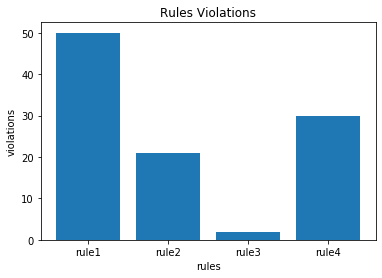

In [26]:
rules = list(violated.keys())
violations = list(violated.values())
plt.bar(rules,violations)
plt.xlabel("rules")
plt.ylabel("violations")
plt.title("Rules Violations")
plt.show()

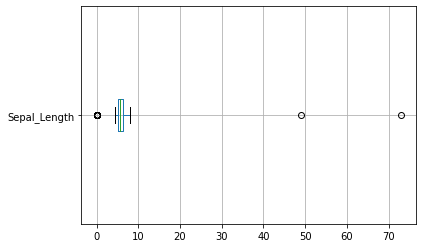

In [27]:
data.boxplot(column = "Sepal_Length",vert = False)

In [28]:
data.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,150.000000,150.000000,150.000000,150.000000
mean,6.122000,3.006667,3.886300,1.102667
std,6.770791,3.301589,5.589785,0.806180
min,0.000000,-3.000000,0.000000,0.000000
25%,5.000000,2.700000,1.400000,0.200000
50%,5.700000,3.000000,4.100000,1.300000
75%,6.400000,3.275000,5.100000,1.800000
max,73.000000,30.000000,63.000000,2.500000


In [29]:
#Calculate statistical summary of boxplot
summary = np.percentile(data['Sepal_Length'],[25,50,75])
iqr = summary[2] - summary[0]
whisker_low = summary[0] - (1.5*iqr)
whisker_high = summary[2] + 1.5*iqr
outliers = (data['Sepal_Length'][(data['Sepal_Length'] < whisker_low) | (data['Sepal_Width'] > whisker_high)].values.ravel())
# data[['Sepal_Length']data['Sepal_Length']<whisker_low) | (data['Sepal_Length']>whisker_high)]
#Print summary
print("Median: ",summary[2])
print("Q1: ",summary[0])
print("Q3: ",summary[2])
print("Lower whisker : ",whisker_low)
print("Higher whisker : ",whisker_high)
print("Outliers : ",outliers)


Median:  6.4
Q1:  5.0
Q3:  6.4
Lower whisker :  2.8999999999999995
Higher whisker :  8.5
Outliers :  [ 0.  0.  0. 73.  0.  0.  0.  0.  0.  0.  0. 49.  0.]
